In [36]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns # Để vẽ confusion matrix đẹp hơn
import numpy as np # Cần cho việc lấy danh sách các lớp duy nhất


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_data.csv')

In [39]:
text_column = 'text'
label_column = 'Topic'

In [40]:
print("Thông tin DataFrame ban đầu:")
print(df.info())
print("\nPhân bố nhãn ('Topic') ban đầu:")
print(df[label_column].value_counts(normalize=True)) # Sử dụng normalize=True để xem tỷ lệ phần trăm
print("-" * 50)

Thông tin DataFrame ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16003 entries, 0 to 16002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16003 non-null  object
 1   Topic   16003 non-null  object
dtypes: object(2)
memory usage: 250.2+ KB
None

Phân bố nhãn ('Topic') ban đầu:
Topic
Giáo dục 4.0               0.028057
Người Việt 5 châu          0.027995
Giải trí giới sao          0.027745
Tin tức sức khoẻ           0.027682
Việc làm                   0.027682
Giải trí nhạc              0.027557
Giải trí phim              0.027495
Ebank                      0.027495
Sống khoẻ                  0.027432
Dân sinh                   0.027432
Bóng đá                    0.027370
Giao thông                 0.027370
Chính trị                  0.027307
Các môn thể thao khác      0.027245
Quân sự                    0.027120
Hậu trường thể thao        0.026995
Kinh doanh quốc tế         0.026870
Nhịp sống            

In [41]:
# 1. Tách Features (X) và Target (y)
# X sẽ là cột 'text', y sẽ là cột 'Topic'
X = df[text_column]
y = df[label_column]

In [42]:
# 2. Xác định tỷ lệ phân chia
# Ví dụ: 70% cho huấn luyện, 15% cho kiểm định, 15% cho kiểm tra
test_size_ratio = 0.15  # 15% cho tập Test
validation_size_ratio = 0.15 # 15% cho tập Validation (tính trên tổng dữ liệu ban đầu)
# train_size_ratio = 1 - test_size_ratio - validation_size_ratio # Sẽ là 0.7 (70%)

In [43]:
# 3. Phân chia lần 1: Tách tập Test ra khỏi toàn bộ dữ liệu
# X_temp và y_temp sẽ chứa dữ liệu cho Training và Validation
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=test_size_ratio,
    stratify=y,  # Rất quan trọng: Giữ nguyên tỷ lệ phân bố các lớp trong tập Test
    random_state=42  # Để đảm bảo kết quả có thể tái tạo mỗi khi chạy code
)

In [44]:
# 4. Phân chia lần 2: Tách tập Training và Validation từ phần còn lại (X_temp, y_temp)
# Cần tính toán lại tỷ lệ cho tập validation so với kích thước của X_temp
# validation_split_ratio = validation_size_original / (1 - test_size_original)
# Ví dụ: 0.15 / (1 - 0.15) = 0.15 / 0.85
validation_relative_ratio = validation_size_ratio / (1 - test_size_ratio)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=validation_relative_ratio,
    stratify=y_temp, # Rất quan trọng: Giữ nguyên tỷ lệ phân bố các lớp trong tập Validation
    random_state=42 # Để đảm bảo kết quả có thể tái tạo
)

In [45]:
# 5. Kiểm tra kích thước và phân bố của các tập dữ liệu
print("\n--- KÍCH THƯỚC CÁC TẬP DỮ LIỆU ---")
print(f"Kích thước tập Huấn luyện (Train): {X_train.shape[0]} mẫu ({len(X_train)/len(X)*100:.2f}%)")
print(f"Kích thước tập Kiểm định (Validation): {X_val.shape[0]} mẫu ({len(X_val)/len(X)*100:.2f}%)")
print(f"Kích thước tập Kiểm tra (Test): {X_test.shape[0]} mẫu ({len(X_test)/len(X)*100:.2f}%)")
print(f"Tổng số mẫu đã chia: {len(X_train) + len(X_val) + len(X_test)} / {len(X)}")


--- KÍCH THƯỚC CÁC TẬP DỮ LIỆU ---
Kích thước tập Huấn luyện (Train): 11201 mẫu (69.99%)
Kích thước tập Kiểm định (Validation): 2401 mẫu (15.00%)
Kích thước tập Kiểm tra (Test): 2401 mẫu (15.00%)
Tổng số mẫu đã chia: 16003 / 16003


In [46]:
print("\n--- PHÂN BỐ NHÃN ('Topic') TRONG CÁC TẬP DỮ LIỆU ---")
print("\nPhân bố nhãn trong tập Huấn luyện (y_train):")
print(y_train.value_counts(normalize=True))

print("\nPhân bố nhãn trong tập Kiểm định (y_val):")
print(y_val.value_counts(normalize=True))

print("\nPhân bố nhãn trong tập Kiểm tra (y_test):")
print(y_test.value_counts(normalize=True))


--- PHÂN BỐ NHÃN ('Topic') TRONG CÁC TẬP DỮ LIỆU ---

Phân bố nhãn trong tập Huấn luyện (y_train):
Topic
Giáo dục 4.0               0.028122
Người Việt 5 châu          0.028033
Việc làm                   0.027676
Tin tức sức khoẻ           0.027676
Giải trí giới sao          0.027676
Giải trí nhạc              0.027587
Giải trí phim              0.027498
Ebank                      0.027498
Sống khoẻ                  0.027408
Dân sinh                   0.027408
Bóng đá                    0.027319
Giao thông                 0.027319
Chính trị                  0.027230
Các môn thể thao khác      0.027230
Quân sự                    0.027140
Hậu trường thể thao        0.026962
Kinh doanh quốc tế         0.026873
AI                         0.026783
Nhịp sống                  0.026783
Thiết bị                   0.026694
Giải trí thời trang        0.026605
Vũ trụ                     0.026426
Tin tức Giáo dục           0.026337
Sân khấu mỹ thuật          0.026158
Thị trường xe              0.0

In [ ]:
# 1. Biểu diễn Dữ liệu bằng TF-IDF
# Khởi tạo TfidfVectorizer
# Bạn có thể thử nghiệm với các tham số như:
# - max_df: loại bỏ các từ xuất hiện quá thường xuyên (ví dụ: max_df=0.95)
# - min_df: loại bỏ các từ xuất hiện quá ít (ví dụ: min_df=2)
# - ngram_range: để sử dụng n-grams (ví dụ: ngram_range=(1, 2) cho unigrams và bigrams)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90,  # Bỏ qua các từ xuất hiện trong hơn 90% tài liệu
    min_df=5,     # Bỏ qua các từ xuất hiện ít hơn 5 lần
    ngram_range=(1, 2) # Sử dụng cả unigrams và bigrams
)

# Fit TfidfVectorizer trên tập huấn luyện và transform nó
print("Đang thực hiện TF-IDF Vectorization...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform tập kiểm định và tập kiểm tra (CHỈ DÙNG `transform`, KHÔNG `fit_transform`)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Kích thước ma trận TF-IDF cho tập huấn luyện: {X_train_tfidf.shape}")
print(f"Kích thước ma trận TF-IDF cho tập kiểm định: {X_val_tfidf.shape}")
print(f"Kích thước ma trận TF-IDF cho tập kiểm tra: {X_test_tfidf.shape}")
print(f"Số lượng features (từ vựng) được tạo ra: {len(tfidf_vectorizer.get_feature_names_out())}")
print("-" * 50)

Đang thực hiện TF-IDF Vectorization...
Kích thước ma trận TF-IDF cho tập huấn luyện: (11201, 86922)
Kích thước ma trận TF-IDF cho tập kiểm định: (2401, 86922)
Kích thước ma trận TF-IDF cho tập kiểm tra: (2401, 86922)
Số lượng features (từ vựng) được tạo ra: 86922
--------------------------------------------------


In [48]:
# Lấy danh sách các lớp (chủ đề) duy nhất để đặt tên cho trục của confusion matrix
# Sắp xếp để đảm bảo thứ tự nhất quán
class_names = sorted(y_train.unique())

# Hàm để vẽ Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name} (Validation Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

Đang huấn luyện mô hình Multinomial Naive Bayes...
Huấn luyện Multinomial Naive Bayes hoàn tất.

Kết quả Multinomial Naive Bayes trên tập Validation:
Accuracy: 0.8730
Classification Report:
                          precision    recall  f1-score   support

                     AI       0.75      0.91      0.82        64
                Bóng đá       0.89      0.94      0.91        66
          Chuyển đổi số       0.74      0.46      0.57        63
              Chân dung       0.76      0.90      0.83        50
              Chính trị       0.93      0.97      0.95        66
            Chứng khoán       0.95      0.92      0.93        59
               Các bệnh       0.00      0.00      0.00         2
  Các môn thể thao khác       0.91      0.97      0.94        66
                 Du học       0.92      0.92      0.92        51
                Du lịch       1.00      0.46      0.63        26
               Dân sinh       0.86      0.76      0.81        66
                  Ebank     

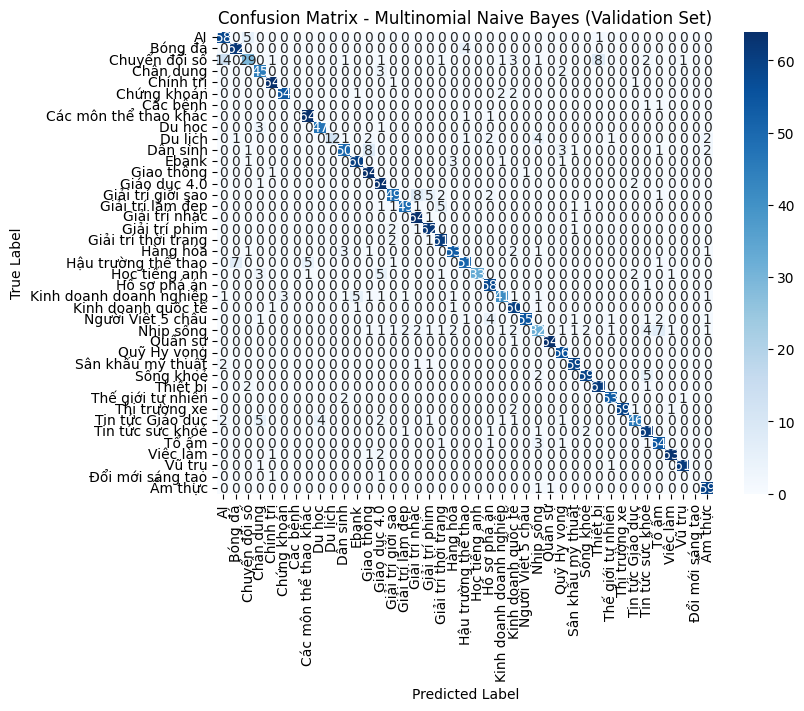

--------------------------------------------------
Đang huấn luyện mô hình Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Huấn luyện Logistic Regression hoàn tất.

Kết quả Logistic Regression trên tập Validation:
Accuracy: 0.8788
Classification Report:
                          precision    recall  f1-score   support

                     AI       0.75      0.88      0.81        64
                Bóng đá       0.90      0.91      0.90        66
          Chuyển đổi số       0.69      0.49      0.57        63
              Chân dung       0.84      0.92      0.88        50
              Chính trị       0.92      0.92      0.92        66
            Chứng khoán       0.93      0.92      0.92        59
               Các bệnh       0.00      0.00      0.00         2
  Các môn thể thao khác       0.94      0.97      0.96        66
                 Du học       0.92      0.92      0.92        51
                Du lịch       0.95      0.77      0.85        26
               Dân sinh       0.83      0.79      0.81        66
                  Ebank       0.91      0.94      0.93        66
             Giao thôn

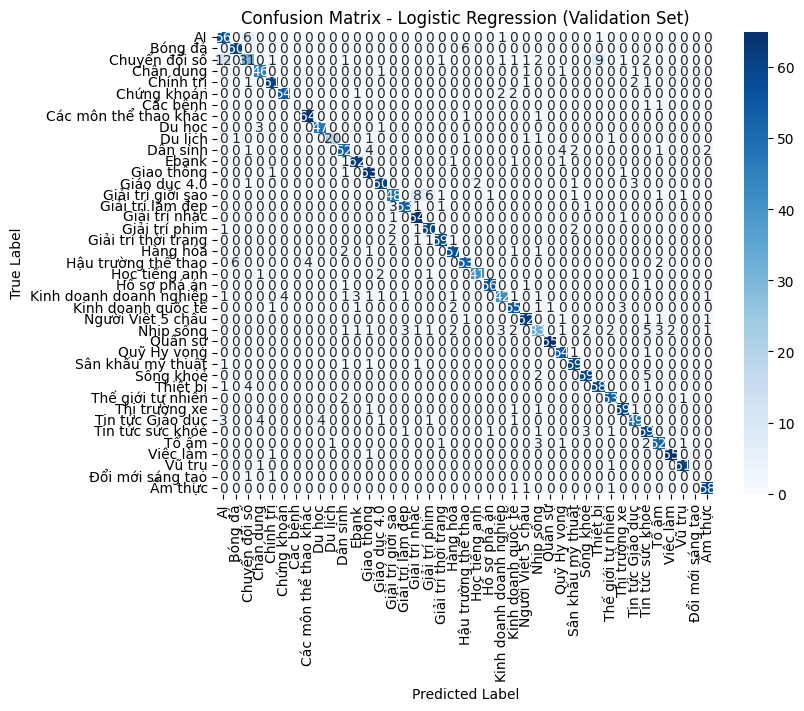

--------------------------------------------------


In [49]:
# 2. Huấn luyện Mô hình Cơ bản

# --- Mô hình 1: Multinomial Naive Bayes ---
print("Đang huấn luyện mô hình Multinomial Naive Bayes...")
model_nb = MultinomialNB(alpha=0.1)
model_nb.fit(X_train_tfidf, y_train)
print("Huấn luyện Multinomial Naive Bayes hoàn tất.")

# Đánh giá trên tập validation
y_val_pred_nb = model_nb.predict(X_val_tfidf)
print("\nKết quả Multinomial Naive Bayes trên tập Validation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_nb):.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_nb, labels=class_names, zero_division=0))
# Vẽ Confusion Matrix
plot_confusion_matrix(y_val, y_val_pred_nb, classes=class_names, model_name="Multinomial Naive Bayes")
print("-" * 50)

# --- Mô hình 2: Logistic Regression ---
print("Đang huấn luyện mô hình Logistic Regression...")
model_lr = LogisticRegression(
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42,
    multi_class='ovr'
)
model_lr.fit(X_train_tfidf, y_train)
print("Huấn luyện Logistic Regression hoàn tất.")

# Đánh giá trên tập validation
y_val_pred_lr = model_lr.predict(X_val_tfidf)
print("\nKết quả Logistic Regression trên tập Validation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr, labels=class_names, zero_division=0))
# Vẽ Confusion Matrix
plot_confusion_matrix(y_val, y_val_pred_lr, classes=class_names, model_name="Logistic Regression")
print("-" * 50)

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện cho Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset # Để tạo Dataset object cho Hugging Face Trainer
import torch # Cần cho Hugging Face Transformers nếu dùng backend PyTorch

In [51]:
df_g2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_data.csv')
df_g2 = df_g2.sample(frac=1, random_state=42).reset_index(drop=True) # Xáo trộn

In [52]:
X_g2 = df_g2['text']
y_g2 = df_g2['Topic']

In [53]:
test_size_ratio_g2 = 0.15
validation_size_ratio_g2 = 0.15
validation_relative_ratio_g2 = validation_size_ratio_g2 / (1 - test_size_ratio_g2)

X_temp_g2, X_test_text, y_temp_g2, y_test_text = train_test_split(
    X_g2, y_g2, test_size=test_size_ratio_g2, stratify=y_g2, random_state=42
)
X_train_text, X_val_text, y_train_text, y_val_text = train_test_split(
    X_temp_g2, y_temp_g2, test_size=validation_relative_ratio_g2, stratify=y_temp_g2, random_state=42
)

In [54]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_text)
y_val_encoded = label_encoder.transform(y_val_text)
y_test_encoded = label_encoder.transform(y_test_text) # Sẽ dùng ở Giai đoạn 4
class_names_original = label_encoder.classes_
num_classes = len(class_names_original)

print(f"Số lượng lớp: {num_classes}")
print(f"Kích thước X_train_text: {X_train_text.shape}, y_train_encoded: {y_train_encoded.shape}")
print(f"Kích thước X_val_text: {X_val_text.shape}, y_val_encoded: {y_val_encoded.shape}")
print("-" * 50)

Số lượng lớp: 41
Kích thước X_train_text: (11201,), y_train_encoded: (11201,)
Kích thước X_val_text: (2401,), y_val_encoded: (2401,)
--------------------------------------------------


In [55]:
# Hàm vẽ Confusion Matrix (giữ nguyên)
def plot_confusion_matrix_custom(y_true_encoded, y_pred_encoded, original_classes, model_name):
    cm = confusion_matrix(y_true_encoded, y_pred_encoded)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=original_classes, yticklabels=original_classes)
    plt.title(f'Confusion Matrix - {model_name} (Validation Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Hàm vẽ biểu đồ training history cho Keras
def plot_keras_history(history, model_name):
    plt.figure(figsize=(12, 4))
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

In [56]:
# Danh sách để lưu kết quả của các mô hình học sâu
deep_learning_results = []


--- Bắt đầu xây dựng và huấn luyện mô hình CNN ---
Kích thước X_train_padded: (11201, 200)
Kích thước X_val_padded: (2401, 200)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Bắt đầu huấn luyện CNN...
Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0864 - loss: 3.5378 - val_accuracy: 0.5485 - val_loss: 1.9441
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4720 - loss: 1.9697 - val_accuracy: 0.6739 - val_loss: 1.2395
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6102 - loss: 1.3593 - val_accuracy: 0.7272 - val_loss: 1.0029
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7028 - loss: 1.0147 - val_accuracy: 0.7489 - val_loss: 0.8858
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7716 - loss: 0.7711 - val_accuracy: 0.7693 - val_loss: 0.8449
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8262 - loss: 0.5985 - val_accuracy: 0.7838 - val_loss: 0.7974
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.5041 - val_accuracy: 0.7876 - val_loss: 0.7953
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8826 - lo

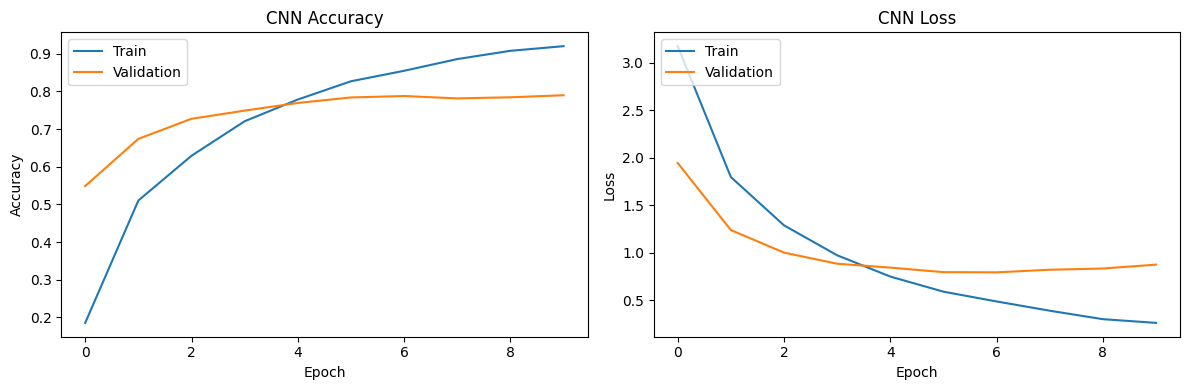

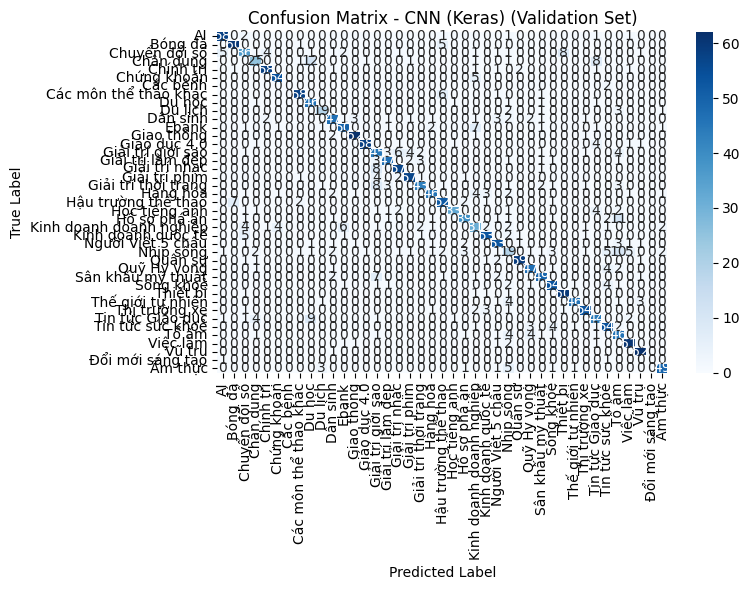

--------------------------------------------------


In [ ]:
# --- Mô hình 3: CNN với Keras ---
print("\n--- Bắt đầu xây dựng và huấn luyện mô hình CNN ---")

# 3.1. Chuẩn bị dữ liệu cho CNN (Tokenization và Padding)
VOCAB_SIZE = 10000  # Kích thước từ vựng (số từ phổ biến nhất giữ lại)
MAX_LEN_CNN = 200     # Độ dài tối đa của một chuỗi sau khi padding
EMBEDDING_DIM_CNN = 100 # Kích thước vector embedding

# Tokenizer của Keras
cnn_tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<unk>")
cnn_tokenizer.fit_on_texts(X_train_text)

# Chuyển text thành chuỗi số nguyên
X_train_seq = cnn_tokenizer.texts_to_sequences(X_train_text)
X_val_seq = cnn_tokenizer.texts_to_sequences(X_val_text)

# Padding để các chuỗi có cùng độ dài
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_LEN_CNN, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=MAX_LEN_CNN, padding='post', truncating='post')

print(f"Kích thước X_train_padded: {X_train_padded.shape}")
print(f"Kích thước X_val_padded: {X_val_padded.shape}")

# 3.2. Xây dựng mô hình CNN
model_cnn = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM_CNN, input_length=MAX_LEN_CNN),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # num_classes là số lượng chủ đề
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Vì y_train_encoded là số nguyên
                  metrics=['accuracy'])

model_cnn.summary()

# 3.3. Huấn luyện mô hình CNN
BATCH_SIZE_CNN = 32
EPOCHS_CNN = 50 # Giữ ở mức thấp để chạy nhanh, tăng lên nếu cần (vd: 10-20)

# Sử dụng EarlyStopping để dừng huấn luyện sớm nếu không có cải thiện
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nBắt đầu huấn luyện CNN...")
history_cnn = model_cnn.fit(
    X_train_padded, y_train_encoded,
    epochs=EPOCHS_CNN,
    batch_size=BATCH_SIZE_CNN,
    validation_data=(X_val_padded, y_val_encoded),
    callbacks=[early_stopping],
    verbose=1
)
print("Huấn luyện CNN hoàn tất.")

# 3.4. Đánh giá mô hình CNN trên tập Validation
loss_cnn, acc_cnn = model_cnn.evaluate(X_val_padded, y_val_encoded, verbose=0)
y_val_pred_proba_cnn = model_cnn.predict(X_val_padded)
y_val_pred_cnn_encoded = np.argmax(y_val_pred_proba_cnn, axis=1) # Lấy index của xác suất cao nhất
ll_cnn = log_loss(y_val_encoded, y_val_pred_proba_cnn)

deep_learning_results.append({'model': 'CNN (Keras)', 'accuracy': acc_cnn, 'log_loss': ll_cnn})

print("\nKết quả CNN trên tập Validation:")
print(f"Accuracy: {acc_cnn:.4f}")
print(f"Log Loss: {ll_cnn:.4f}")
print("Classification Report (nhãn gốc):\n",
      classification_report(y_val_encoded, y_val_pred_cnn_encoded,
                            target_names=class_names_original, zero_division=0))

# Vẽ biểu đồ training history và confusion matrix
plot_keras_history(history_cnn, "CNN")
plot_confusion_matrix_custom(y_val_encoded, y_val_pred_cnn_encoded,
                       original_classes=class_names_original, model_name="CNN (Keras)") # ĐÃ SỬA
print("-" * 50)

In [58]:
# --- Mô hình 4: Fine-tuning PhoBERT (Hugging Face Transformers) ---
print("\n--- Bắt đầu xây dựng và huấn luyện mô hình PhoBERT ---")

# 4.1. Chuẩn bị dữ liệu cho PhoBERT
MODEL_NAME_PHOBERT = "vinai/phobert-base"
MAX_LEN_PHOBERT = 128 # PhoBERT có giới hạn input là 256, nhưng 128 thường đủ cho tin tức ngắn

# Tokenizer của PhoBERT
phobert_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_PHOBERT)

# Hàm để tokenize dữ liệu
def tokenize_function_phobert(examples):
    return phobert_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=MAX_LEN_PHOBERT)

# Tạo Dataset objects từ pandas DataFrame
train_dataset_hf = Dataset.from_pandas(pd.DataFrame({'text': X_train_text, 'label': y_train_encoded}))
val_dataset_hf = Dataset.from_pandas(pd.DataFrame({'text': X_val_text, 'label': y_val_encoded}))

# Tokenize datasets
train_dataset_tokenized = train_dataset_hf.map(tokenize_function_phobert, batched=True)
val_dataset_tokenized = val_dataset_hf.map(tokenize_function_phobert, batched=True)

# Loại bỏ cột 'text' không cần thiết sau khi tokenize
train_dataset_tokenized = train_dataset_tokenized.remove_columns(["text"])
val_dataset_tokenized = val_dataset_tokenized.remove_columns(["text"])
# Đặt định dạng để trả về PyTorch tensors
train_dataset_tokenized.set_format("torch")
val_dataset_tokenized.set_format("torch")


--- Bắt đầu xây dựng và huấn luyện mô hình PhoBERT ---


Map:   0%|          | 0/11201 [00:00<?, ? examples/s]

Map:   0%|          | 0/2401 [00:00<?, ? examples/s]

In [59]:
# 4.2. Tải mô hình PhoBERT và định nghĩa Training Arguments
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng thiết bị: {device}")

model_phobert = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME_PHOBERT,
    num_labels=num_classes
).to(device)


# Định nghĩa hàm tính metrics cho Trainer
def compute_metrics_hf(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    # Có thể thêm các metrics khác như F1, precision, recall nếu muốn
    return {"accuracy": acc}

BATCH_SIZE_PHOBERT = 8 # Giảm batch size nếu gặp lỗi Out of Memory (OOM), đặc biệt khi không có GPU mạnh
EPOCHS_PHOBERT = 1 # Giữ ở mức rất thấp để chạy nhanh. Trong thực tế cần 2-5 epochs.
LEARNING_RATE_PHOBERT = 2e-5

training_args = TrainingArguments(
    output_dir="./phobert_results",
    num_train_epochs=EPOCHS_PHOBERT,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs"
)


trainer = Trainer(
    model=model_phobert,
    args=training_args,
    train_dataset=train_dataset_tokenized,
    eval_dataset=val_dataset_tokenized,
    compute_metrics=compute_metrics_hf,
    tokenizer=phobert_tokenizer # Truyền tokenizer để padding đúng cách khi cần
)

Sử dụng thiết bị: cuda


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 12.12 MiB is free. Process 3954 has 14.73 GiB memory in use. Of the allocated memory 954.47 MiB is allocated by PyTorch, and 65.53 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# 4.3. Huấn luyện mô hình PhoBERT
print("\nBắt đầu huấn luyện PhoBERT...")
try:
    trainer.train()
    print("Huấn luyện PhoBERT hoàn tất.")

    # 4.4. Đánh giá mô hình PhoBERT trên tập Validation
    print("\nĐánh giá PhoBERT trên tập Validation...")
    eval_results = trainer.evaluate()
    acc_phobert = eval_results['eval_accuracy']

    # Lấy dự đoán xác suất để tính log_loss
    predictions_output = trainer.predict(val_dataset_tokenized)
    y_val_pred_proba_phobert = tf.nn.softmax(predictions_output.predictions, axis=1).numpy() # Chuyển logits sang probabilities
    y_val_pred_phobert_encoded = np.argmax(y_val_pred_proba_phobert, axis=1)
    ll_phobert = log_loss(y_val_encoded, y_val_pred_proba_phobert)

    deep_learning_results.append({'model': 'PhoBERT', 'accuracy': acc_phobert, 'log_loss': ll_phobert})

    print("\nKết quả PhoBERT trên tập Validation:")
    print(f"Accuracy: {acc_phobert:.4f}")
    print(f"Log Loss: {ll_phobert:.4f}")
    print("Classification Report (nhãn gốc):\n",
          classification_report(y_val_encoded, y_val_pred_phobert_encoded,
                                target_names=class_names_original, zero_division=0))

    # Vẽ Confusion Matrix
    plot_confusion_matrix_custom(y_val_encoded, y_val_pred_phobert_encoded,
                           classes=class_names_original, model_name="PhoBERT")

    # Vẽ biểu đồ training/validation loss và accuracy (từ log_history của Trainer)
    # Trainer log history có thể phức tạp hơn Keras history.
    # Đây là một cách đơn giản hóa để trích xuất:
    train_log = [log for log in trainer.state.log_history if 'loss' in log and 'eval_loss' not in log]
    eval_log = [log for log in trainer.state.log_history if 'eval_loss' in log]

    if train_log and eval_log:
        epochs = [log['epoch'] for log in train_log]
        train_loss = [log['loss'] for log in train_log]
        # eval_accuracy = [log['eval_accuracy'] for log in eval_log] # Cần đảm bảo eval_accuracy có trong log
        eval_loss = [log['eval_loss'] for log in eval_log]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        # plt.plot(epochs, train_accuracy, label='Train Accuracy') # Trainer không log train_accuracy mặc định
        # plt.plot(epochs, eval_accuracy, label='Validation Accuracy')
        # plt.title('PhoBERT Accuracy')
        # plt.xlabel('Epoch')
        # plt.ylabel('Accuracy')
        # plt.legend()
        # Vì Trainer không log train accuracy mỗi step/epoch, chúng ta chỉ vẽ loss
        plt.plot([log['epoch'] for log in train_log], [log['loss'] for log in train_log], label='Train Loss')
        plt.plot([log['epoch'] for log in eval_log], [log['eval_loss'] for log in eval_log], label='Validation Loss')
        plt.title('PhoBERT Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Không đủ log để vẽ biểu đồ training history cho PhoBERT.")

except RuntimeError as e:
    if "out of memory" in str(e).lower():
        print("\nLỖI: CUDA out of memory! Hãy thử giảm BATCH_SIZE_PHOBERT và/hoặc MAX_LEN_PHOBERT.")
        print("Nếu không có GPU hoặc GPU yếu, huấn luyện Transformer có thể rất khó khăn.")
    else:
        raise e
except Exception as e:
    print(f"Đã có lỗi xảy ra trong quá trình huấn luyện PhoBERT: {e}")
    print("Bỏ qua phần PhoBERT và tiếp tục...")


print("-" * 50)
print("Giai đoạn 3B hoàn tất.")

In [ ]:
# Hiển thị kết quả tổng hợp của các mô hình học sâu
if deep_learning_results:
    df_deep_learning_results = pd.DataFrame(deep_learning_results)
    print("\n--- KẾT QUẢ TỔNG HỢP CÁC MÔ HÌNH HỌC SÂU (TRÊN TẬP VALIDATION) ---")
    print(df_deep_learning_results)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y='accuracy', data=df_deep_learning_results, palette='crest')
    plt.title('So sánh Accuracy các mô hình Học sâu (Validation Set)')
    plt.ylabel('Accuracy')
    plt.xlabel('Mô hình')
    plt.ylim(0, 1)
    for index, row in df_deep_learning_results.iterrows():
        plt.text(index, row['accuracy'] + 0.01, f"{row['accuracy']:.4f}", color='black', ha="center")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y='log_loss', data=df_deep_learning_results, palette='flare')
    plt.title('So sánh Log Loss các mô hình Học sâu (Validation Set)')
    plt.ylabel('Log Loss (Càng thấp càng tốt)')
    plt.xlabel('Mô hình')
    min_ll_dl = df_deep_learning_results['log_loss'].min()
    max_ll_dl = df_deep_learning_results['log_loss'].max()
    if not np.isnan(min_ll_dl) and not np.isnan(max_ll_dl) : # Kiểm tra NaN
         plt.ylim(0, max_ll_dl + 0.1 * abs(max_ll_dl) if max_ll_dl != 0 else 0.1)
    for index, row in df_deep_learning_results.iterrows():
        if not np.isnan(row['log_loss']):
            plt.text(index, row['log_loss'] + 0.01 * abs(max_ll_dl if max_ll_dl != 0 else 0.1), f"{row['log_loss']:.4f}", color='black', ha="center")
    plt.tight_layout()
    plt.show()
else:
    print("Không có kết quả từ mô hình học sâu để hiển thị.")